# Eigenvalues-Eigenvectors-Power-Method-Google-Page-Rank
This notebook presents how to compute the eigenvalues and eigenvectors of a matrix. Then, we implement and test the Power Method and the Normalized Power Method to compute the dominant eigenvalues of a matrix. Lastly, we show the application to the Google Page Rank problem.

## Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Eigenvalues and Eigenvectors

Given a matrix $A$, to compute its eigenvalues we can use the Python function eig, defined in the linear algebra class of NumPy library. The command numpy.linalg.eig(A) gives two outputs: an array object containing the eigenvalues of the matrix $A$ and a bidimensional array (a matrix) containing the corresponding eigenvectors.

For example, let us compute the eigenvalues for the following matrices $A$ in $\mathbb{R}^{3\times 3}$ and $B$ in $\mathbb{R}^{2\times2}$:

$$
A = \left[\begin{array}{ccc}
1&2&3\\
1&2&7\\
1&3&5\\
\end{array}\right]
$$

$$
B = \left[ \begin{array}{cc}
1&-1\\
1&1\\
\end{array}\right]
$$
We will show that $A\in \mathbb{R}^{3\times 3}$ has all real eigenvalues. The matrix $B\in \mathbb{R}^{2\times2}$ has only complex eigenvalues. 

In [2]:
A = np.array([[1,2,3],[1,2,7],[1,3,5]])

# In l we find the eigenvalues of A
# in v we find the corresponding eigenvectors
l,v = np.linalg.eig(A)

print('eigenvalues of A', l)
print('matrix containing the corresponding eigenvectors\n', v )
print('for matrix A eigenvalues and eigenvectors are real.')

eigenvalues of A [ 8.95513156  0.34386002 -1.29899158]
matrix containing the corresponding eigenvectors
 [[ 0.40249394  0.97995133  0.27697554]
 [ 0.67748344 -0.1728427  -0.8838416 ]
 [ 0.61564179 -0.09909994  0.37697292]]
for matrix A eigenvalues and eigenvectors are real.


In [3]:
B = np.array([[1,-1],[1,1]])
l_B, v_B = np.linalg.eig(B)
print('eigenvalues of B', l_B)
print('matrix of the corresponding eigenvectors \n', v_B)
print('for matrix B eigenvalues and eigenvectors are complex.')

eigenvalues of B [1.+1.j 1.-1.j]
matrix of the corresponding eigenvectors 
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]
for matrix B eigenvalues and eigenvectors are complex.


## Power method to compute the absolute dominant eigenvalue

We use the power method to compute the absolute dominant eigenvalue $\lambda_1$ for the matrix $A$. Looking at the values we just computed via the Python function eig, we notice that the sought $\lambda_1\approx 9$.

Let us write a function for the power method algorithm. As input, we provide a vector $u_0$ freely chosen, the matrix $A$, a tolerance specified by the user and a maximum number of iterations. 
For this version, we are going to use an estimate of the absolute error, together with the maximum number of iterations as a stopping criterion. 

$$
err := |\lambda_{k+1} - \lambda_k|
$$

This variable "err" contains the absolute value of the difference between two successive approximations of $\lambda_1$ obtained at the $k$-th iteration and at the $(k+1)$-th iteration, respectively. 

In [4]:
def Power_Met(u0, A, tol=1e-6, it_max=100):
    n_it = 0
    approx = [] # We collect all the lambda_k in a list 
    err = []    # We use a list also to store the error estimates at every iteration

    u0 = np.dot(A,u0) # iterative algorithm
    lam0 = np.dot(u0.T, np.dot(A,u0))/(np.dot(u0.T,u0)) # compute the Rayleigh quotient 
    approx.append(lam0) # Save the firsts approximation of lambda_0
    err.append(1)
    
    while (err[-1] > tol) & (n_it < it_max):
        u0 = np.dot(A,u0)
        u1 = np.dot(A,u0.T)
        lam = np.dot(u0.T ,u1)/(np.inner(u0,u0)) # compute the Rayleigh quotient 

        approx.append(lam)
        err.append(abs(lam-lam0))
        lam0 = lam
        n_it = n_it+1 
    return lam, u0, n_it, err, approx

In [5]:
[lam,u0,n_it,err, approx] = Power_Met(np.array([1,1,1]), A, 1e-4, 100)

print('Last computed value', lam)
print('Total number of iterations', n_it)
print('Corresponding computed eigenvector', u0)
print('Error at the last step ', err[-1])

Last computed value -2.9618228835636904
Total number of iterations 100
Corresponding computed eigenvector [1402790974 2032990386  874434785]
Error at the last step  2.8315077450423813


The last computed value, that should be a rather good approximation for $\lambda_1$, is obviusly incorrect! Let us do a plot to better see the trend of the computed $\lambda_k$.

Text(0.5, 1.0, 'Error behaviour')

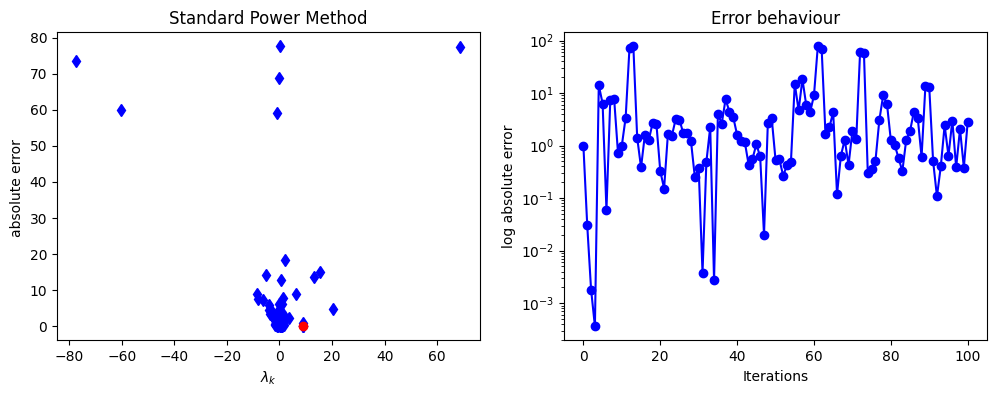

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(approx,err,'db',l[0],0,'or') # We plot in blue the lambda_k and in red the "right" value
plt.xlabel('$\lambda_k$')
plt.ylabel('absolute error ') # It is in fact an estimate of the absolute error
plt.title('Standard Power Method')

plt.subplot(1,2,2)
plt.semilogy(np.linspace(0,n_it,n_it+1),err,'-ob')
plt.xlabel('Iterations')
plt.ylabel('log absolute error')
plt.title('Error behaviour')

From the first plot, it is still not that clear, although it is evident an oscillating behavior of the error. To gain even more insight about the problem, we can plot the error vs the number of iterations by using a semilogarithmic scale. From the last plot, there are really no doubts: the error is badly oscillating. There are picks of order of magnitude $10^2$, which clearly means, the method is not converging! The reason behind this behavior must be searched into "numerics." To have a stable algorithm, we should use the "normalization" step. Let us try then to normalize the sequence of vectors $u_k$ at every step and then analyze the results. <br>
<b>NB: We can increase the number of iterations, we can set a different threshold. These will not solve the problem. Anyway, it is not possible that the method fails for a $3x3$ matrix. Here the problem is related to how Windows handle the number. If we create an integer vector, Windows doesn't convert directly in float numbers and so surely the method fails. If we put $[1. 1. 1.]$ also the standard method works.</b>

# Normalized Power Method

In [7]:
def Power_Met_Norm(u0, A, tol=1e-6, it_max=100):
    n_it = 0
    approx = [] # We collect all the lambda_k in a list 
    err = []    # We use a list also to store the error estimates at every iteration
    
    y0 = u0/np.linalg.norm(u0)
    zk = np.dot(A,y0)/np.linalg.norm(np.dot(A,y0))  #iterative algorithm
    lam0 = np.dot(zk.T , np.dot(A,zk))/(np.dot(zk.T,zk))  # compute the Rayleigh quotient 
    
    approx.append(lam0)
    err.append(1)
    
    while (err[-1] > tol) & (n_it < it_max):
        zk = np.dot(A,zk)/np.linalg.norm(np.dot(A,zk))
        lam = np.dot(zk.T , np.dot(A,zk))/(np.dot(zk.T,zk))  # compute the Rayleigh quotient 
        approx.append(lam)
        err.append(abs(lam-lam0))
        lam0 = lam
        n_it = n_it+1
    return lam, zk, n_it, err, approx

In [8]:
[lamN,uN,n_itN,errN, approxN] = Power_Met_Norm(np.array([1,1,1]),A,1e-4,100)

print('Last computed value', lamN)
print('Number of total iterations', n_itN)
print('Corresponding computed eigenvector ', uN)
print('last computed error ', errN[-1])

Last computed value 8.955125255780143
Number of total iterations 4
Corresponding computed eigenvector  [0.40249305 0.67748514 0.61564051]
last computed error  4.869403356622115e-05


Now, with only $4$ iteration, the method converges to the sought $\lambda_1$ with accuracy $10^{-5}$. Let us plot again the error behavior, by using a semilogarithmic scale.

Text(0.5, 1.0, 'Error behaviour')

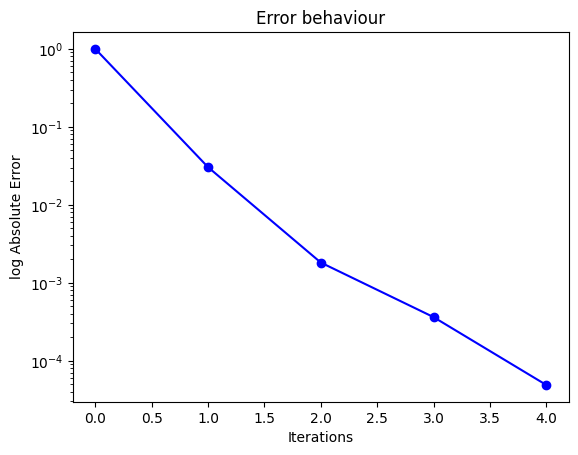

In [9]:
plt.semilogy(np.linspace(0,n_itN,n_itN+1),errN,'-ob')
plt.xlabel('Iterations')
plt.ylabel('log Absolute Error')
plt.title('Error behaviour')

## Google Page-Ranking

Let us consider a simplified version of the net.<br>
We notice that we have five web pages, but we also have a so-called dangling node, which is page 5. <br>
- As first thing, we construct the hyperlink matrix H:

$$
H = \left[\begin{array}{ccccc}
0&1/2&1/4&1&0\\
1&0&1/4&0&0\\
0&1/2&0&0&0\\
0&0&1/4&0&0\\
0&0&1/4&0&0\\
\end{array}\right]
$$

- As a second step, we construct the matrix S, where we replace every zero-column vector in H with a vector having as entries $1/n$, with $n$ denoting the number of total web-pages

$$
S = \left[\begin{array}{ccccc}
0&1/2&1/4&1&1/5\\
1&0&1/4&0&1/5\\
0&1/2&0&0&1/5\\
0&0&1/4&0&1/5\\
0&0&1/4&0&1/5\\
\end{array}\right]
$$

- To obtain a primitive and irreducible matrix, we need to construct the Google matrix G: 

$$
G = \alpha S +\frac{(1-\alpha)}{n}{\bf 1}
$$

where $\alpha$ is chosen as $0.85$ and ${\bf 1}$ denotes a $n\times n$ matrix filled with ones. 
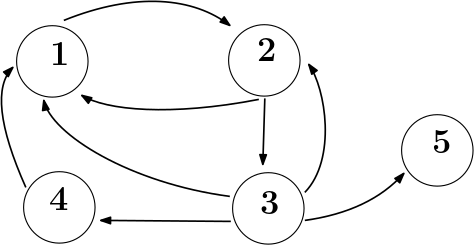

In [10]:
S = np.array([[0,1/5,1/3,1/5,1/4],[1/3,1/5,1/3,1/5,1/4],[1/3,1/5,0,1/5,1/4],[1/3,1/5,0,1/5,1/4],[0,1/5,1/3,1/5,0]])
print('S matrix\n ', S)

alpha = 0.85
n = 5

S matrix
  [[0.         0.2        0.33333333 0.2        0.25      ]
 [0.33333333 0.2        0.33333333 0.2        0.25      ]
 [0.33333333 0.2        0.         0.2        0.25      ]
 [0.33333333 0.2        0.         0.2        0.25      ]
 [0.         0.2        0.33333333 0.2        0.        ]]


In [11]:
G = alpha*S + (1-alpha)/n*np.ones([5,5])
print('\n Google matrix G \n', G)


 Google matrix G 
 [[0.03       0.2        0.31333333 0.2        0.2425    ]
 [0.31333333 0.2        0.31333333 0.2        0.2425    ]
 [0.31333333 0.2        0.03       0.2        0.2425    ]
 [0.31333333 0.2        0.03       0.2        0.2425    ]
 [0.03       0.2        0.31333333 0.2        0.03      ]]


In the simplified web model, we would like to compute the ranking of the five pages. To this end we need the power method which computes the corresponding eigenvector of the eigenvalue $\lambda=1$.
Hence, we write a simplified version of the function Power_Met_Norm to accomplish this task:

In [12]:
def Page_Rank(u0,A,tol,it_max):
    n_it = 0
    err = [] # We use a list also to store the error estimates at every iteration

    y0 = u0/np.linalg.norm(u0)    
    zk = np.dot(A,y0)/np.linalg.norm(np.dot(A,y0))  #iterative algorithm
    err.append(1)
    
    while (err[-1] > tol) & (n_it < it_max):
        temp = zk
        zk = np.dot(A,zk)/np.linalg.norm(np.dot(A,zk))
        err.append(np.linalg.norm(temp-zk))
        n_it = n_it+1
        
    return zk,n_it,err

In [13]:
z,n_it,err = Page_Rank(np.array([1,1,1,1,1]), G, 1e-5,100)
print('Final computed zk \n', z)
print('Total number of iteration', n_it)
print('Final accuracy',err[-1])

Final computed zk 
 [0.43326424 0.55602227 0.43326424 0.43326424 0.35733111]
Total number of iteration 6
Final accuracy 1.717667925928821e-06
